In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import numpy as np



In [9]:
# Loading the dataset
file_path = 'IrisData.csv'  
data = pd.read_csv(file_path)
print(data)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [10]:
# This is a preproccesing the data
# it drops the Id columns
data = data.drop(columns=['Id'])



In [11]:
# Encoding'Species' column to numerical values
label_encoder = LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])



In [12]:
# Separating features and target variable
X = data.drop(columns=['Species'])
y = data['Species']



In [13]:
# Scaleing features to a uniform range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [86]:
# Spliting the dataset into training 70% and test sets 30% 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=18, stratify=y)



In [87]:
# Initialize and training the logistic regression model (ONE-VS-ALL)
model = LogisticRegression(multi_class='ovr', max_iter=200, random_state=18)
model.fit(X_train, y_train)



LogisticRegression(max_iter=200, multi_class='ovr', random_state=18)

In [88]:
# Predict of the test
y_pred = model.predict(X_test)

# Evaluating the performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred, output_dict=True)
confusion_matrix_output = confusion_matrix(y_test, y_pred)



In [89]:
# Printing the result
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



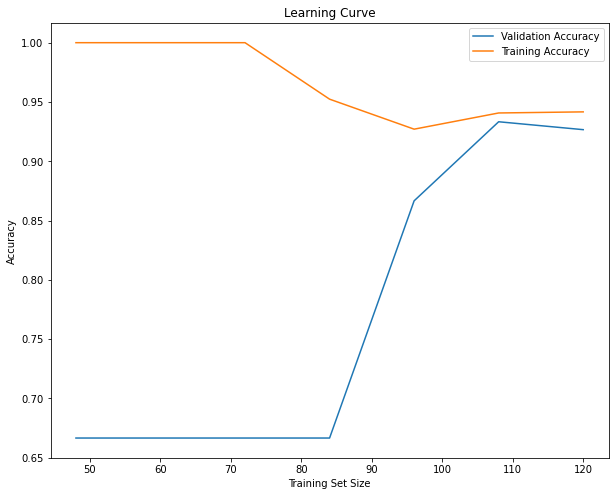

In [49]:
# Learning Curve evaluation
train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=18)
test_mean = np.mean(test_scores, axis=1)
train_mean = np.mean(train_scores, axis=1)

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.title('Learning Curve')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.legend()
plt.show()



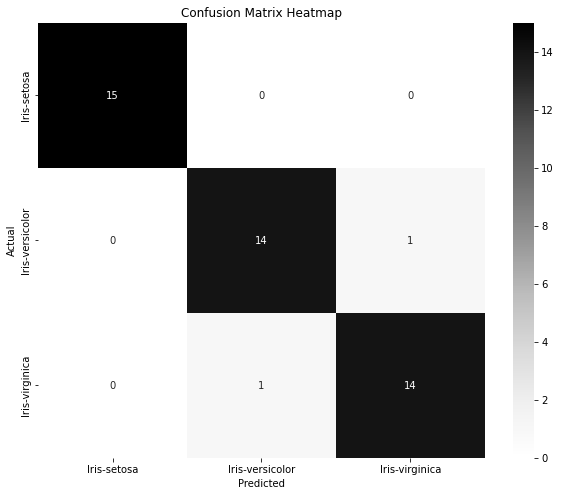

In [50]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_output, annot=True, fmt='d', cmap='Greys', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



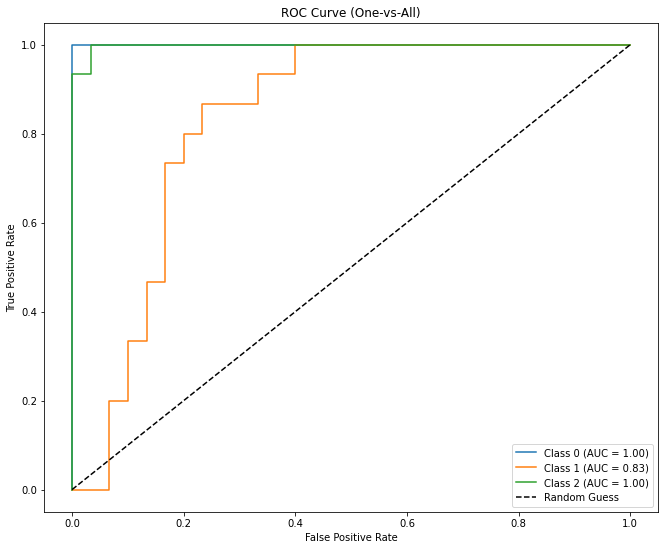

In [51]:
# Receiver operating characteristic (ROC) Curves for Multi-Class
plt.figure(figsize=(11, 9))
for i in range(3):  
    fpr, tpr, _ = roc_curve(y_test == i, model.decision_function(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve (One-vs-All)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

